<h2>911 Call Data Analysis</h2>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


<h3>Top 5 zipcodes for 911 calls</h3>

In [14]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<h3>Top 5 townships for 911 calls</h3>

In [16]:
df['twp'].value_counts()[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<h3>Unique emergency call types</h3>

In [18]:
df['title'].nunique()

110

<h3>Creating new features from the data</h3>
<p>There are 3 distinct departments that get dispatched for a 911 call. EMS, Fire, and Traffic</p>
<p>Who is dispatched the most?</p>

In [20]:
def getDepartment(call):
    return call.split(':')[0]

In [22]:
df['Department'] = df['title'].apply(lambda call : getDepartment(call))

In [27]:
df['Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Department, dtype: int64

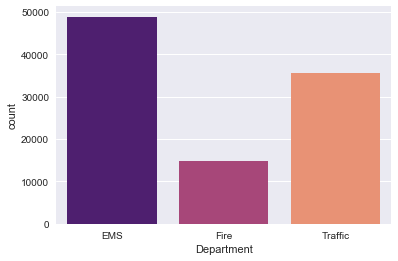

In [36]:
sns.countplot(x='Department', data=df, palette="magma")

<h2>Programmically analyze time information</h2>

In [67]:
# Data type of timeStamp
type(df['timeStamp'].iloc[0])

str

In [69]:
# Convert the time stamp string to a DateTime object
df['timeStamp'] = df['timeStamp'].apply(lambda time: pd.to_datetime(time))

In [80]:
# Create 3 new columns for Hour, Month, Day of Week
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [85]:
# The DateTime Day of Week is a 0-6 integer, use map() method to put them as text.
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

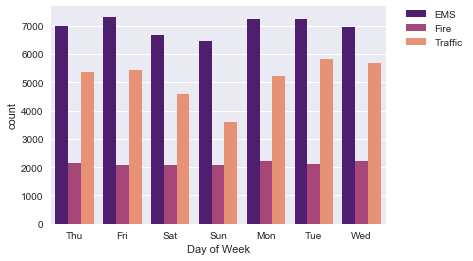

In [92]:
# Plot the Day of Week
sns.countplot(x='Day of Week', data=df, hue='Department', palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

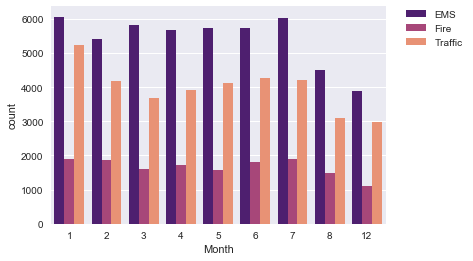

In [97]:
# Month Data
sns.countplot(x='Month', data=df, hue='Department', palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

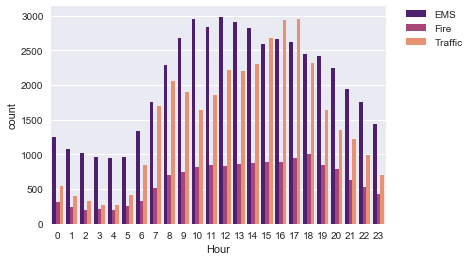

In [98]:
#Hour
sns.countplot(x='Hour', data=df, hue='Department', palette="magma")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

<h3>Notice...</h3>
<p>Some of the month data is missing. We do not have data for Aug, Sept and Nov.</p>
<p>Plot the existing data as a line graph the extrapolate the best fit for those missing months</p>

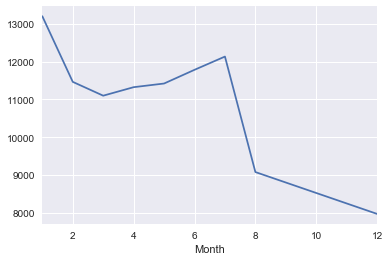

In [134]:
byMonth = df.groupby('Month').count()
byMonth['lat'].plot()

<h2>Draw a linear regression line on the data set</h2>

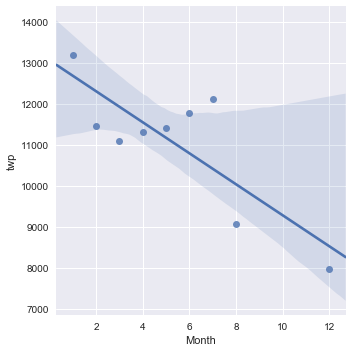

In [140]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

<h3>Aggregate the Date info and plot it across the 3 services dispatched</h3>

In [189]:
df['Date'] = df['timeStamp'].apply(lambda time: time.date())
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Department,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


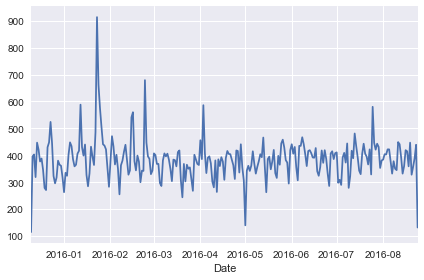

In [190]:
byDate = df.groupby('Date').count()
byDate['lat'].plot(xlim=['2015-12-10', '2016-08-24'])
plt.tight_layout()

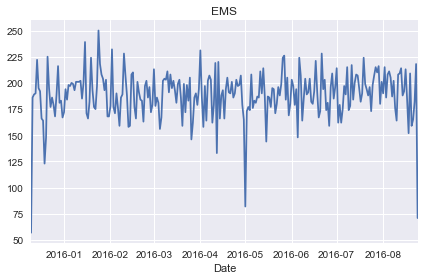

In [170]:
df[df['Department'] == 'EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

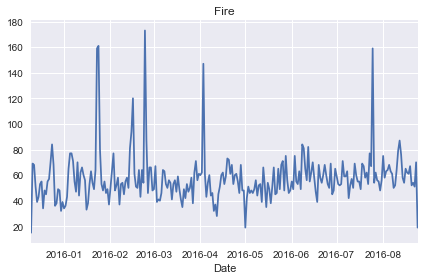

In [171]:
df[df['Department'] == 'Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

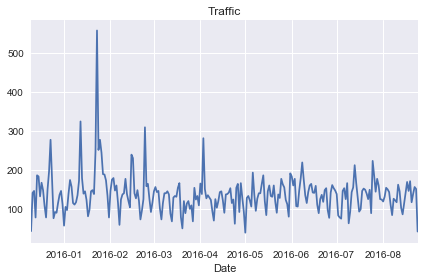

In [172]:
df[df['Department'] == 'Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

In [212]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()['Department'].unstack()

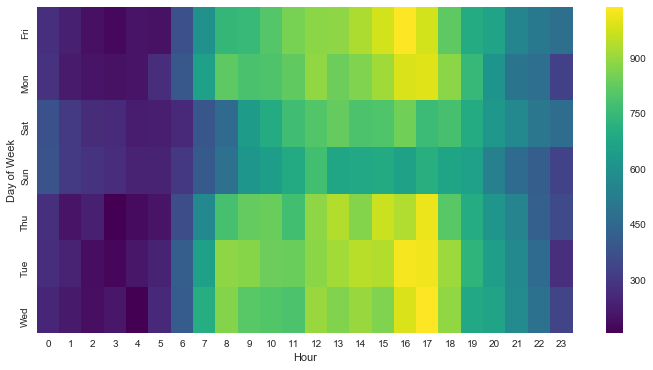

In [208]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


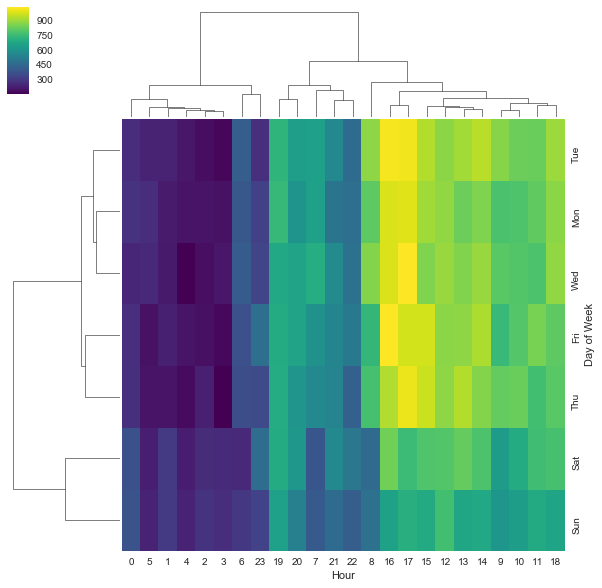

In [209]:
sns.clustermap(dayHour,cmap='viridis')

In [211]:
dayMonth = df.groupby(by=['Day of Week', 'Month']).count()['Department'].unstack()

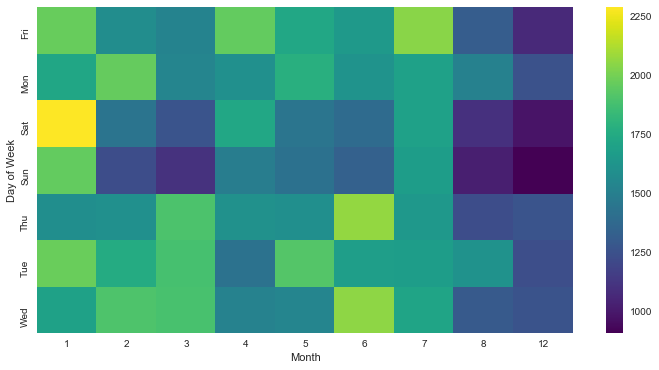

In [214]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


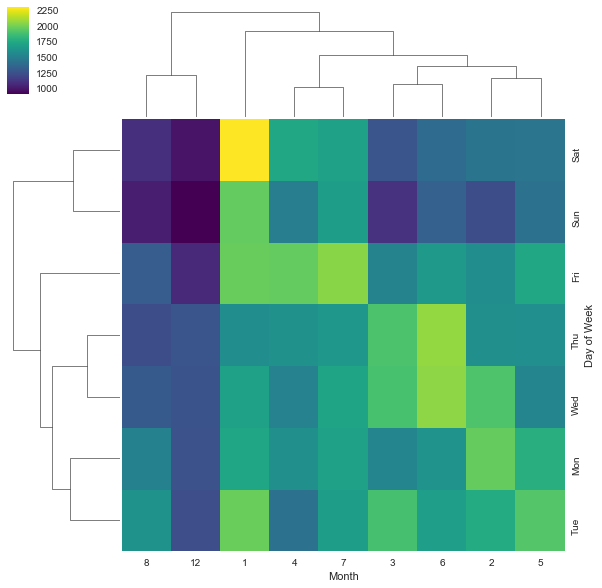

In [215]:
sns.clustermap(dayMonth,cmap='viridis')